<a href="https://colab.research.google.com/github/FaisalAhmedBijoy/Tensorflow-for-Deep-Learning-Udacity/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import glob

In [2]:
print('Current working directory: ',os.getcwd())

Current working directory:  /content


## Setup Dataset Path 

In [3]:
'''
building_house=glob.glob('dataset_building/building_house/*.*')
mosque=glob.glob('dataset_building/mosque/*.*')
temple=glob.glob('dataset_building/temple/*.*')
tinshed=glob.glob('dataset_building/tinshed/*.*')
sky_building=glob.glob('dataset_building/sky_building/*.*')
mud_house=glob.glob('dataset_building/mud_house/*.*')
'''


"\nbuilding_house=glob.glob('dataset_building/building_house/*.*')\nmosque=glob.glob('dataset_building/mosque/*.*')\ntemple=glob.glob('dataset_building/temple/*.*')\ntinshed=glob.glob('dataset_building/tinshed/*.*')\nsky_building=glob.glob('dataset_building/sky_building/*.*')\nmud_house=glob.glob('dataset_building/mud_house/*.*')\n"

In [4]:
''' 
print('Building house data : ',len(building_house))
print('Mosque data: ',len(mosque))
print('Temple data: ',len(temple))
print('Tinshed data: ',len(tinshed))
print('Sky building data: ',len(sky_building))
print('Mud house data: ',len(mud_house))
'''


" \nprint('Building house data : ',len(building_house))\nprint('Mosque data: ',len(mosque))\nprint('Temple data: ',len(temple))\nprint('Tinshed data: ',len(tinshed))\nprint('Sky building data: ',len(sky_building))\nprint('Mud house data: ',len(mud_house))\n"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/train'
test_path='/content/drive/My Drive/CSE 4000 Thesis/Dataset1500/test'
print(os.listdir(train_path))
print(os.listdir(test_path))

['building_house', 'mosque', 'temple', 'tinshed', 'mud_house', 'sky_building']
['mud_house', 'building_house', 'mosque', 'sky_building', 'temple', 'tinshed']


## Dataset Preprocssing using ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
WIDTH=224
HEIGHT=224

In [9]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip=True,
                                    shear_range=0.1 ,
                                    zoom_range=0.1,
                                    rotation_range=10,
                                    height_shift_range=0.1,
                                    fill_mode='nearest',
                                    validation_split=0.2)
                                     
train_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT),
                                                 class_mode='categorical',
                                                 subset='training')

validation_dataset = train_generator.flow_from_directory(batch_size=32,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical',
                                                 subset='validation')

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [10]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(batch_size=32,
                                                 directory=test_path,
                                                 shuffle=True,
                                                 target_size=(WIDTH, HEIGHT), 
                                                 class_mode='categorical')

Found 300 images belonging to 6 classes.


In [11]:
train_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [12]:
validation_dataset.class_indices

{'building_house': 0,
 'mosque': 1,
 'mud_house': 2,
 'sky_building': 3,
 'temple': 4,
 'tinshed': 5}

In [13]:
total_class=len(train_dataset.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  6


## Plot some random image
- class 0: building house
- class 1: mosque
- class 2: mud house
- class 3: sky building
- class 4: temple
- class 5: tinshed

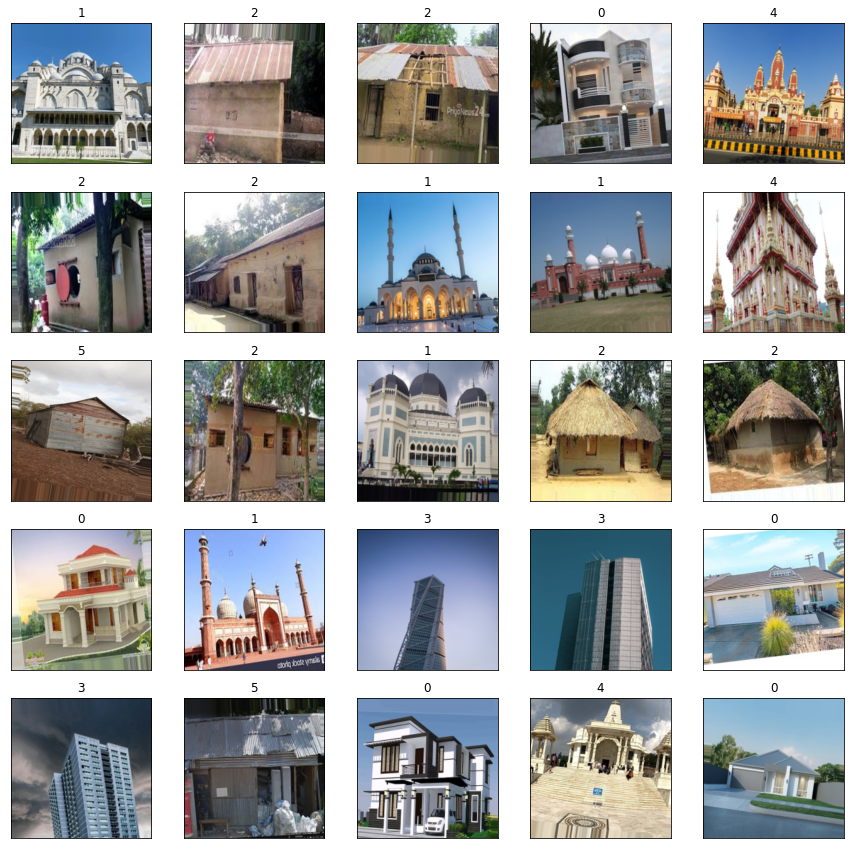

In [14]:
x,y=train_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

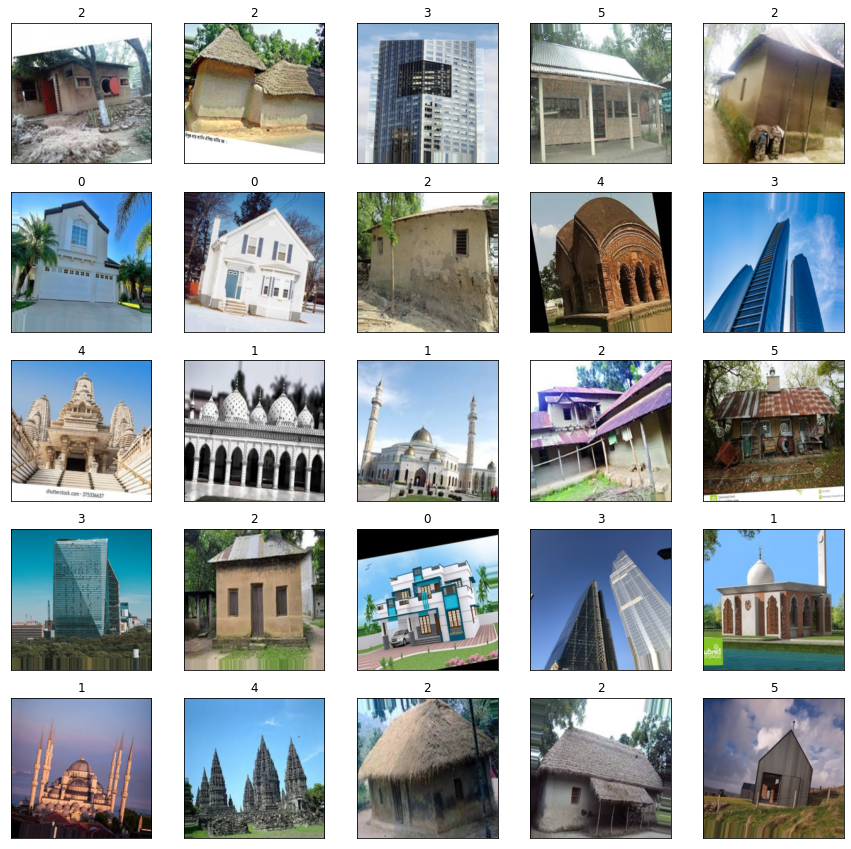

In [15]:
x,y=validation_dataset.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Define Convolutional Neural Network Architecture

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(total_class,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

## Compile CNN Model

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## Trained  CNN Model

In [20]:
epochs=200
batch_size=32
trainset_length=len(train_dataset.labels)
validation_length=len(validation_dataset.labels)
steps_per_epoch=(trainset_length//batch_size)
validation_steps=(validation_length//batch_size)
print(trainset_length)
print(validation_length)
print(steps_per_epoch)
print(validation_steps)

960
240
30
7


In [21]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5', verbose=1 ,save_best_only=True)

In [22]:
history = model.fit(train_dataset,
                    steps_per_epoch = steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_dataset,
                    validation_steps=validation_steps,callbacks=[checkpointer])

Epoch 1/200
30/30 [==============================] - 618s 20s/step - loss: 10.6270 - accuracy: 0.3547 - val_loss: 3.0234 - val_accuracy: 0.2411

Epoch 00001: val_loss improved from inf to 3.02341, saving model to /content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/building.model.best.hdf5
Epoch 2/200
30/30 [==============================] - 20s 670ms/step - loss: 3.1642 - accuracy: 0.5403 - val_loss: 6.7776 - val_accuracy: 0.2143

Epoch 00002: val_loss did not improve from 3.02341
Epoch 3/200
30/30 [==============================] - 20s 652ms/step - loss: 2.3723 - accuracy: 0.4876 - val_loss: 5.2136 - val_accuracy: 0.2991

Epoch 00003: val_loss did not improve from 3.02341
Epoch 4/200
30/30 [==============================] - 20s 653ms/step - loss: 1.5879 - accuracy: 0.5569 - val_loss: 3.2971 - val_accuracy: 0.3304

Epoch 00004: val_loss did not improve from 3.02341
Epoch 5/200
30/30 [==============================] - 20s 652ms/step - loss: 1.2332 - accuracy: 0.5956 - val_

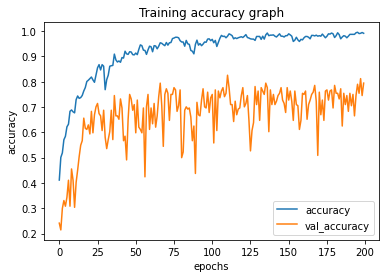

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

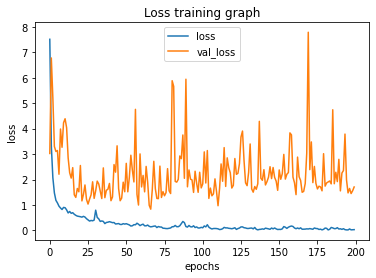

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

## Testing the model

In [25]:
test_loss,test_accuracy=model.evaluate(validation_dataset)

8/8 [==============================] - 4s 486ms/step - loss: 1.3468 - accuracy: 0.8167


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  81.66666626930237


## Save Model h5 format
This file includes
- Model architecture
- Model weight values during training
- model training config 
- optimizer 

In [27]:
import time
t = time.time()
export_path_keras = "/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model{}_time_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
model.save(export_path_keras)

/content/drive/MyDrive/CSE 4000 Thesis/Transfer Learning TF Keras/CNN_model0.8166666626930237_time_1619794462.h5


## Reload the model h5 format

In [28]:
from tensorflow.keras.models import load_model

In [29]:
reload_model=load_model(export_path_keras)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

## Check Random Image

In [30]:
image_batch,label_batch=next(iter(validation_dataset))

In [31]:
label_batch[:5]

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

## Classification report 

In [32]:
predicted_result=model.predict(validation_dataset)
predicted_result[:5]

array([[9.9999940e-01, 6.1115465e-08, 4.5077744e-11, 6.5204624e-09,
        5.7229425e-08, 3.6398248e-07],
       [2.7488330e-01, 1.5249091e-02, 1.1535850e-03, 5.4670661e-03,
        6.9667548e-01, 6.5714940e-03],
       [1.7366743e-04, 7.7774911e-03, 9.6892422e-01, 3.3851945e-06,
        2.1905414e-04, 2.2902250e-02],
       [7.4392611e-01, 2.5606138e-01, 3.8550870e-06, 1.0085274e-06,
        6.5904887e-06, 1.0497714e-06],
       [2.3907756e-13, 9.9999857e-01, 1.6883304e-17, 6.2941683e-14,
        1.3980368e-06, 6.2458762e-18]], dtype=float32)

In [33]:
predicted_value=np.argmax(model.predict(validation_dataset),axis=-1)
predicted_value

array([2, 1, 4, 1, 4, 0, 2, 5, 1, 0, 0, 0, 3, 5, 1, 5, 4, 1, 4, 4, 5, 2,
       3, 1, 2, 0, 4, 1, 4, 4, 5, 3, 3, 5, 2, 1, 3, 3, 3, 5, 5, 2, 4, 4,
       2, 4, 1, 1, 2, 0, 4, 0, 1, 5, 1, 1, 1, 1, 3, 4, 4, 0, 1, 0, 5, 3,
       5, 1, 2, 1, 1, 5, 5, 2, 2, 2, 1, 5, 0, 0, 5, 1, 2, 4, 3, 5, 2, 0,
       0, 5, 1, 1, 0, 4, 5, 1, 5, 2, 1, 4, 5, 2, 0, 0, 2, 3, 1, 1, 1, 2,
       1, 5, 1, 5, 2, 0, 3, 0, 2, 3, 2, 4, 1, 0, 5, 3, 5, 3, 2, 5, 2, 5,
       5, 2, 1, 2, 5, 5, 3, 3, 3, 5, 5, 3, 0, 1, 0, 4, 2, 3, 5, 5, 1, 1,
       4, 0, 1, 0, 1, 2, 1, 3, 0, 2, 4, 4, 2, 5, 5, 3, 3, 3, 4, 4, 1, 2,
       4, 2, 1, 3, 4, 0, 0, 0, 3, 3, 4, 5, 1, 1, 4, 2, 3, 0, 0, 3, 5, 4,
       0, 4, 0, 5, 0, 0, 1, 0, 1, 5, 1, 3, 3, 0, 2, 0, 4, 0, 3, 2, 5, 4,
       5, 1, 3, 1, 1, 0, 4, 3, 5, 1, 1, 1, 4, 2, 4, 3, 0, 5, 5, 3])

In [34]:
validation_value=validation_dataset.classes
validation_value

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int32)

In [35]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(validation_dataset.classes,predicted_value))

Accuracy score:  0.20416666666666666


In [36]:
from sklearn.metrics import classification_report
print('classification report \n',classification_report(validation_dataset.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.13      0.12      0.13        40
           1       0.24      0.30      0.26        40
           2       0.23      0.20      0.21        40
           3       0.19      0.17      0.18        40
           4       0.29      0.25      0.27        40
           5       0.16      0.17      0.17        40

    accuracy                           0.20       240
   macro avg       0.21      0.20      0.20       240
weighted avg       0.21      0.20      0.20       240



## Another approach to calculate the classification report

In [37]:
predicted_array=model.predict(validation_dataset)
predicted_array

array([[6.2079978e-04, 2.5947785e-02, 4.5822930e-04, 8.6989399e-05,
        7.5063682e-01, 2.2224943e-01],
       [1.9624013e-20, 6.2908447e-24, 1.0000000e+00, 1.4166365e-38,
        3.0755338e-29, 4.1533793e-10],
       [3.1232206e-10, 9.9140781e-01, 5.1895910e-07, 6.9021533e-10,
        8.5916854e-03, 1.9223684e-08],
       ...,
       [8.0850685e-01, 1.0503682e-01, 1.3516226e-04, 2.5348004e-04,
        8.5820988e-02, 2.4673837e-04],
       [5.5839540e-04, 1.7644987e-05, 9.9941647e-01, 7.0284321e-09,
        6.0854532e-06, 1.4606593e-06],
       [4.6983459e-03, 5.2314526e-08, 1.4650329e-03, 9.2543441e-06,
        1.2586968e-08, 9.9382728e-01]], dtype=float32)